<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [104]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [105]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [106]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [107]:
boston_df=pd.read_csv(boston_url)
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [108]:
boston_df.head(10)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


#### Add your code below following the instructions given in the course to complete the peer graded assignment


## Task 1: Become familiar with the dataset
The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

## Task 2: Generate Descriptive Statistics and Visualizations
For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

#### 2.1 For the "Median value of owner-occupied homes" provide a boxplot

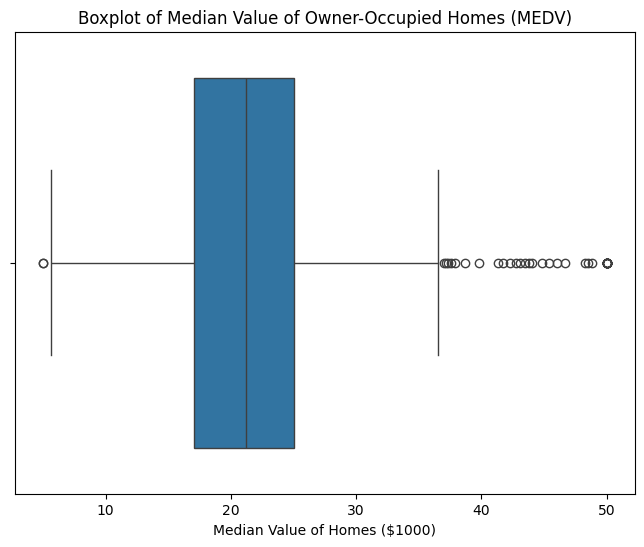

In [109]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.xlabel('Median Value of Homes ($1000)')
plt.show()

The boxplot above shows the median value for the variable MEDV among with outliers

#### 2.2 Provide a  bar plot for the Charles river variable

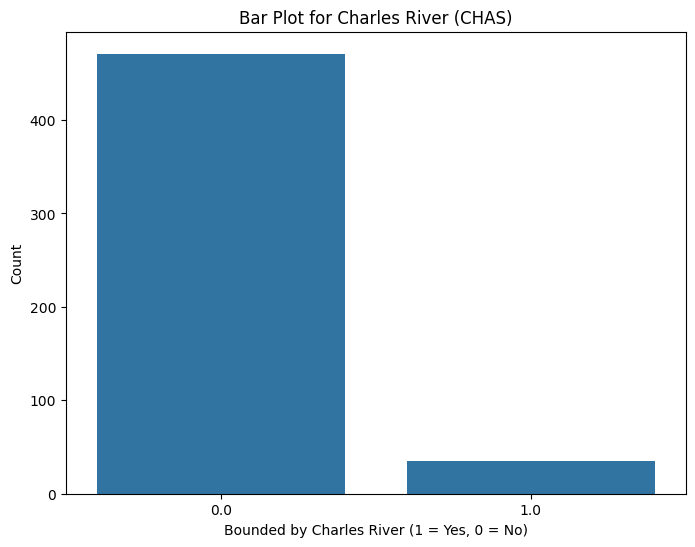

In [110]:
plt.figure(figsize=(8, 6))
sns.countplot(x=boston_df['CHAS'])
plt.title('Bar Plot for Charles River (CHAS)')
plt.xlabel('Bounded by Charles River (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

The histogram shows that the majority of the houses are not near the Charles River

#### 2.3 Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

<AxesSubplot:xlabel='MEDV', ylabel='Age Group'>

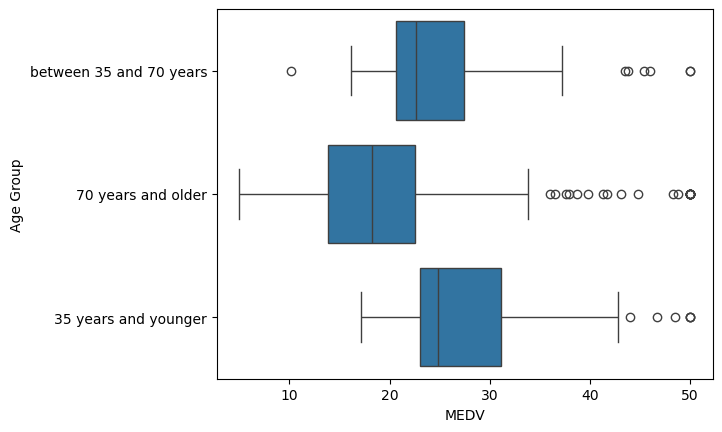

In [111]:
boston_df.loc[(boston_df['AGE'] <= 35), 'Age Group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Age Group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'Age Group'] = '70 years and older'
sns.boxplot(x = 'MEDV', y = 'Age Group', data = boston_df)

The boxplot above shows that on average the median value of owner occupied homes is higher when the Age is lower

#### 2.4 Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

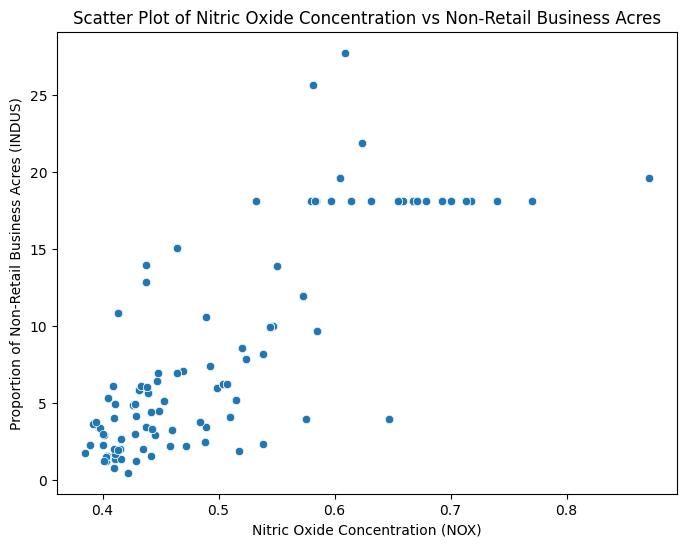

In [112]:
plt.figure(figsize = (8, 6))
sns.scatterplot(x = boston_df['NOX'], y=boston_df['INDUS'])
plt.title('Scatter Plot of Nitric Oxide Concentration vs Non-Retail Business Acres')
plt.xlabel('Nitric Oxide Concentration (NOX)')
plt.ylabel('Proportion of Non-Retail Business Acres (INDUS)')
plt.show()

Values in the bottom-left section of the scatter plot indicates a strong relation between low Nitric oxide concentration and low proportion of non-retail business acres per town.
Generally, a higher proprtion of non-retail business acres per town produces a higher concentration of Nitric oxide.

#### 2.5 Create a histogram for the pupil to teacher ratio variable

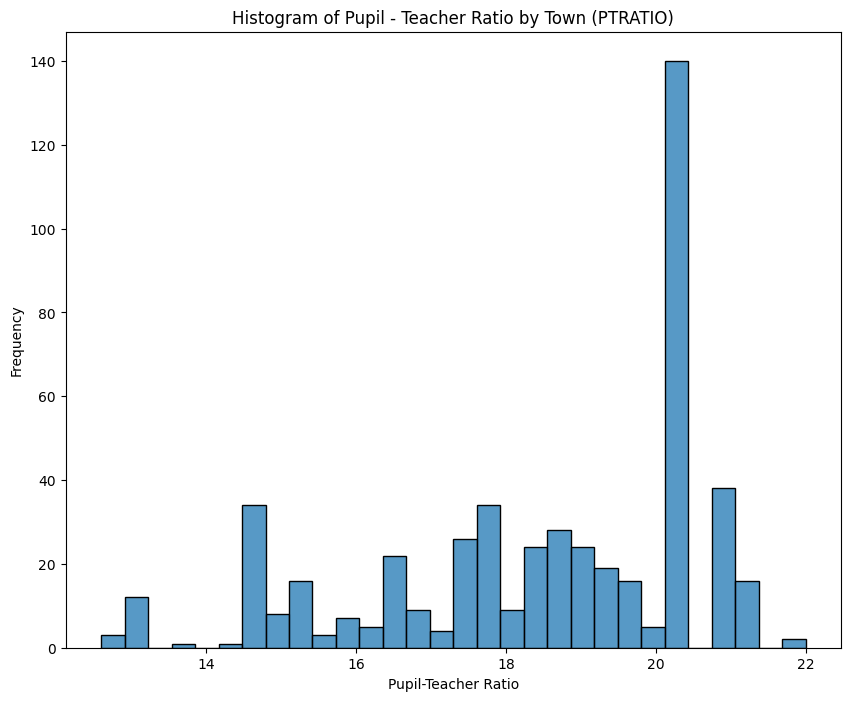

In [113]:
plt.figure(figsize = (10, 8))
sns.histplot(boston_df['PTRATIO'], bins = 30, kde = False)
plt.title('Histogram of Pupil - Teacher Ratio by Town (PTRATIO)')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

This graph shows a histogram of the pupil-teacher ratio (PTRATIO) by town. Pupil-teacher ratio is relatively consistent across towns, with most of them concentrated near the value of 20.

## Task 3: Use the appropriate tests to answer the questions provided.
For each of the following questions;

Be sure to:

State your hypothesis.

Use α = 0.05

Perform the test Statistics.

State the conclusion from the test.

#### 3.1 Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [114]:
import scipy.stats as stats

# Map CHAS to descriptive labels
boston_df['CHAS_T'] = boston_df['CHAS'].map({1: 'NEAR', 0: 'FAR'})

# Perform the T-test for independent samples
t_stat, p_value = stats.ttest_ind(
    boston_df[boston_df['CHAS_T'] == 'FAR']['MEDV'],  # Homes far from the river
    boston_df[boston_df['CHAS_T'] == 'NEAR']['MEDV'], # Homes near the river
    equal_var=True  # Assume equal variance
)

# Output
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Conclusion: Reject the null hypothesis. There is a significant difference in the median value of houses based on proximity to the Charles River.")
else:
    print("Conclusion: Fail to reject the null hypothesis. No significant difference in the median value of houses based on proximity to the Charles River.")

T-statistic: -3.996437466090509
P-value: 7.390623170519905e-05
Conclusion: Reject the null hypothesis. There is a significant difference in the median value of houses based on proximity to the Charles River.


#### 3.2 Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [115]:
lm = ols('MEDV ~ AGE', data = boston_df).fit()
anova_table = sm.stats.anova_lm(lm)
print(anova_table)

# Conclusion
alpha = 0.05
if anova_table['PR(>F)'][0] < alpha:
    print("Reject the null hypothesis. There is a significant difference in median values of homes across different age groups.")
else:
    print("Fail to reject the null hypothesis. No significant difference in median values of homes across different age groups.")

             df        sum_sq      mean_sq          F        PR(>F)
AGE         1.0   6069.761065  6069.761065  83.477459  1.569982e-18
Residual  504.0  36646.534350    72.711378        NaN           NaN
Reject the null hypothesis. There is a significant difference in median values of homes across different age groups.


#### 3.3 Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [116]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(f"Pearson Correlation: {correlation:.3f}, P-value: {p_value:.3f}")

# Conclusion
alpha = 0.05
if p_value < alpha:
    print(f"Reject the null hypothesis. There is a significant correlation (Correlation: {correlation:.3f}).")
else:
    print("Fail to reject the null hypothesis. No significant correlation exists.")

Pearson Correlation: 0.764, P-value: 0.000
Reject the null hypothesis. There is a significant correlation (Correlation: 0.764).


#### 3.4 What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [117]:
# Regression analysis
X = boston_df['DIS']
y = boston_df['MEDV']

# Add constant for intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Conclusion
print(model.summary())
alpha = 0.05
if model.pvalues[1] < alpha:
    print("Reject the null hypothesis. Weighted distance (DIS) has a significant impact on the median value of homes (MEDV).")
else:
    print("Fail to reject the null hypothesis. Weighted distance (DIS) does not have a significant impact on the median value of homes (MEDV).")

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 03 Jan 2025   Prob (F-statistic):           1.21e-08
Time:                        15:56:24   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0